<a href="https://colab.research.google.com/github/MarcoAlbaETT/EMODnet-Physics-Documentation/blob/master/rfvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMODnet Physics - River flow rate (RVFL) querying**

This notebook will illustrate how to build queries and make requests to [ercompwebapps.emodnet-physics.eu/erddap/tabledap/TS_RVFL.html](https://ercompwebapps.emodnet-physics.eu/erddap/tabledap/TS_RVFL.html) using Python.

## **Setup**

To begin we need to import the necessary libraries.

We will also declare a variable BASE_URL which will be used in the following steps as base for building the URLs.

In [ ]:
# !pip install requests pandas matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt
import io

BASE_URL = 'https://ercompwebapps.emodnet-physics.eu/erddap/tabledap/TS_RVFL.csvp'

The data format specified in the BASE_URL is ```csvp```, which will return a csv with the column names (and their unit of measurment) as first row and data starting from the second.
Other possibilities are ```csv``` (in which the first row contains the column names and the second the units of measurment) and ```csv0``` which will return only the data rows.



## **Get a list of platform codes**

After the libraries have been succesfully installed and imported it is possible to make the first request, which will return a list of all the platform codes.
These can be than used in the following requests.

In [ ]:
platforms_query = '?PLATFORMCODE%2Clatitude%2Clongitude&distinct()'
# this will return us three columns: PLATFORMCODE, latitude and longitude (more on this in the next section)
# the additional parameter &distinct() will ensure we will get only unique rows

platform_resp = requests.get(BASE_URL + platforms_query)
platforms_df = pd.read_csv(io.StringIO(platform_resp.text), sep=',')
platforms_df

,PLATFORMCODE,latitude (degrees_north),longitude (degrees_east)
0,10100000,-69.944700,-4.234700
1,10100000,-4.234700,-69.944700
2,12240000,-67.491700,-3.337200
3,12370000,-72.784700,-8.945800
4,12370000,-8.945800,-72.784700
...,...,...,...
3734,Westy,53.390598,-2.560370
3735,Wey-Broadwey,50.653706,-2.473201
3736,Witham-Claypole,53.022354,-0.746079
3737,Worfe-Burcote,52.555340,-2.375983


## **Data gathering**

As can be seen from [ercompwebapps.emodnet-physics.eu/erddap/tabledap/TS_RVFL.html](https://ercompwebapps.emodnet-physics.eu/erddap/tabledap/TS_RVFL.html) there is a list of possible variables that can be selected.

These are:  
PLATFORMCODE, SOURCE, SENSOR, time, TIME_QC, depth, DEPTH_QC, latitude, longitude, POSITION_QC, RVFL, RVFL_QC, RVFL_DM, url_metadata and qc_entity.

Following are three examples of data queries:

###  With PLATFORMCODE and time range

  When building the URL to get the data a platform code can be inserted in the query to get the data relative to the platform.
  In the following example the platform code 'RS_IT_Po_Pontelagoscuro' has been chosen and the variables are:

  - time
  - depth
  - latitude
  - longitude
  - RVFL

  The query will look like:

  ```?time%2Cdepth%2Clatitude%2Clongitude%2CRVFL&PLATFORMCODE=%22RS_IT_Po_Pontelagoscuro%22&time%3E=2024-03-29T09%3A45%3A00Z&time%3C=2024-04-29T09%3A45%3A00Z```

  It can be divided into two main parts:

1. ```?time%2Cdepth%2Clatitude%2Clongitude%2CRVFL```

    Where ```?``` indicates the start of query parametes and the rest is a list of variables we want as columns in the csv, separated by ```%2C```, an encoded comma(,).

2. ```&PLATFORMCODE=%22RS_IT_Po_Pontelagoscuro%22&time%3E=2024-03-29T09%3A45%3A00Z&time%3C=2024-04-29T09%3A45%3A00Z```

    After the list of variables we can add filters, separated by ```&```.

    The platform code chosen is RS_IT_Po_Pontelagoscuro and it has to be inserted between encoded double quotes("), represented by ```%22```.

    The syntax for the timerange is:

    ```time%3E=2024-03-29T09%3A45%3A00Z&time%3C=2024-04-29T09%3A45%3A00Z```

    Here the other encoded characters are ```%3E``` (>), ```%3C``` (<) and ```%3A``` (:).
    
    The time has to be passed as an ISO string, with the format YYYY-MM-DDThh:mm:ssZ.

In [ ]:
platform_code = 'RS_IT_Po_Pontelagoscuro'

variables = '?PLATFORMCODE%2Ctime%2Cdepth%2Clatitude%2Clongitude%2CRVFL'
filters = f'&PLATFORMCODE=%22{platform_code}%22&time%3E=2023-04-29T00%3A00%3A00Z&time%3C=2024-04-29T00%3A00%3A00Z'

data_resp = requests.get(BASE_URL + variables + filters)
data_df = pd.read_csv(io.StringIO(data_resp.text), sep=',')

data_df=data_df.sort_values(by=["time (UTC)"])
data_df.reset_index(drop=True, inplace=True)
data_df

,PLATFORMCODE,time (UTC),depth (m),latitude (degrees_north),longitude (degrees_east),RVFL (m3/s)
0,RS_IT_Po_Pontelagoscuro,2023-05-08T07:30:00Z,0.0,44.8883,11.60807,675.77
1,RS_IT_Po_Pontelagoscuro,2023-05-08T07:45:00Z,0.0,44.8883,11.60807,667.87
2,RS_IT_Po_Pontelagoscuro,2023-05-08T08:00:00Z,0.0,44.8883,11.60807,667.87
3,RS_IT_Po_Pontelagoscuro,2023-05-08T08:15:00Z,0.0,44.8883,11.60807,667.87
4,RS_IT_Po_Pontelagoscuro,2023-05-08T08:30:00Z,0.0,44.8883,11.60807,660.00
...,...,...,...,...,...,...
23315,RS_IT_Po_Pontelagoscuro,2024-04-28T22:00:00Z,0.0,44.8883,11.60807,1747.17
23316,RS_IT_Po_Pontelagoscuro,2024-04-28T22:30:00Z,0.0,44.8883,11.60807,1747.17
23317,RS_IT_Po_Pontelagoscuro,2024-04-28T23:00:00Z,0.0,44.8883,11.60807,1747.17
23318,RS_IT_Po_Pontelagoscuro,2024-04-28T23:30:00Z,0.0,44.8883,11.60807,1747.17


###  With multiple platform codes

It is possible to select multiple platform codes when querying the data. This can be done by using a regex.

In this example the three platform codes used will be 'RS_CA_Dartmouth_PasdeDame', 'Roden-Rodington' and 'RS_ES_Guadalfeo_Orgiva'.

To build these part of the query the regex will have this syntax:

```PLATFORMCODE=~%22(platform_code_1%7Cplatform_code_2%7Cplatform_code_3)```

Where ```%7C``` represents the symbol ```|``` (meaning OR).



In [ ]:
regex_platform_code = '(RS_CA_Dartmouth_PasdeDame%7CRoden-Rodington%7CRS_ES_Guadalfeo_Orgiva)'

variables = '?PLATFORMCODE%2Ctime%2Clatitude%2Clongitude%2CRVFL'
regex_filters = f'&PLATFORMCODE=~%22{regex_platform_code}%22&time%3E=2024-02-20T00%3A00%3A00Z&time%3C=2024-04-29T00%3A00%3A00Z'

regex_data_resp = requests.get(BASE_URL + variables + regex_filters)
regex_data_df = pd.read_csv(io.StringIO(regex_data_resp.text), sep=',')

unique_platform_codes = regex_data_df['PLATFORMCODE'].unique()
print('\nThis DataFrame contains the platform codes:', unique_platform_codes, '\n')

regex_data_df


This DataFrame contains the platform codes: ['RS_CA_Dartmouth_PasdeDame' 'RS_ES_Guadalfeo_Orgiva' 'Roden-Rodington'] 



,PLATFORMCODE,time (UTC),latitude (degrees_north),longitude (degrees_east),RVFL (m3/s)
0,RS_CA_Dartmouth_PasdeDame,2024-02-20T00:00:00Z,48.977670,-64.699690,2.046
1,RS_CA_Dartmouth_PasdeDame,2024-02-20T00:15:00Z,48.977670,-64.699690,2.046
2,RS_CA_Dartmouth_PasdeDame,2024-02-20T00:30:00Z,48.977670,-64.699690,2.046
3,RS_CA_Dartmouth_PasdeDame,2024-02-20T00:45:00Z,48.977670,-64.699690,2.033
4,RS_CA_Dartmouth_PasdeDame,2024-02-20T01:00:00Z,48.977670,-64.699690,2.033
...,...,...,...,...,...
7800,Roden-Rodington,2024-04-23T09:00:00Z,52.723644,-2.609739,2.530
7801,Roden-Rodington,2024-04-24T09:00:00Z,52.723644,-2.609739,2.490
7802,Roden-Rodington,2024-04-25T09:00:00Z,52.723644,-2.609739,2.450
7803,Roden-Rodington,2024-04-26T09:00:00Z,52.723644,-2.609739,2.270


###  With coordinates range

Another possibility when querying the data is to specify a range of coordinates.
This can be done by inserting in the query filters the following:

```latitude%3E=45&latitude%3C=49&longitude%3E=10&longitude%3C=14```

Effectively selecting platforms inside a square delimited by:

- latitude equal or greater than 45 and equal or less than 49

and

- longitude equal or greater than 10 and equal or less than 14.

In [ ]:
coords_variables = '?PLATFORMCODE%2Clatitude%2Clongitude'
coords_filter = '&latitude%3E=45&latitude%3C=49&longitude%3E=10&longitude%3C=14&distinct()'

coords_data_resp = requests.get(BASE_URL + coords_variables + coords_filter)
coords_data_df = pd.read_csv(io.StringIO(coords_data_resp.text), sep=',')
coords_data_df

,PLATFORMCODE,latitude (degrees_north),longitude (degrees_east)
0,ADN-CURRISO,45.761665,13.496333
1,RS_IT_Adige_BoaraPisani,45.105480,11.784244
2,RS_IT_Bacchiglione_Montegalda,45.442730,11.672323
3,RS_IT_Brenta_Barzizza,45.777416,11.730543
4,RS_IT_CanaleLedra_ScolmatoreCorno,46.144040,13.024471
5,RS_IT_Fontanelle_Monticano,45.836945,12.439918
6,RS_IT_Livenza_MedunaDiLivenza,45.805107,12.610580
7,RS_IT_Natisone_Cividale,46.091180,13.430171
8,RS_IT_Segusino_Piave,45.922490,11.948837


We can then select different variables and add a timerange to the filters:

In [ ]:
coords_time_variables = '?PLATFORMCODE%2Clatitude%2Clongitude%2Cdepth%2CRVFL%2CRVFL_QC'
coords_filter += '&latitude%3E=45&latitude%3C=49&longitude%3E=10&longitude%3C=14&time%3E=2024-04-20T00%3A00%3A00Z&time%3C=2024-04-27T00%3A00%3A00Z'

coords_time_data_resp = requests.get(BASE_URL + coords_time_variables + coords_filter)
coords_time_data_df = pd.read_csv(io.StringIO(coords_time_data_resp.text), sep=',')
coords_time_data_df

,PLATFORMCODE,latitude (degrees_north),longitude (degrees_east),depth (m),RVFL (m3/s),RVFL_QC (1)
0,RS_IT_Adige_BoaraPisani,45.10548,11.784244,0.0,286.06,0
1,RS_IT_Adige_BoaraPisani,45.10548,11.784244,0.0,287.51,0
2,RS_IT_Adige_BoaraPisani,45.10548,11.784244,0.0,290.41,0
3,RS_IT_Adige_BoaraPisani,45.10548,11.784244,0.0,291.86,0
4,RS_IT_Adige_BoaraPisani,45.10548,11.784244,0.0,293.32,0
...,...,...,...,...,...,...
192,RS_IT_Segusino_Piave,45.92249,11.948837,0.0,31.41,0
193,RS_IT_Segusino_Piave,45.92249,11.948837,0.0,32.28,0
194,RS_IT_Segusino_Piave,45.92249,11.948837,0.0,33.16,0
195,RS_IT_Segusino_Piave,45.92249,11.948837,0.0,34.06,0


## **Server-side functions**

When getting the data it is also possible to use Server-side functions.

These can be:
- orderBy
- orderByDescending
- orderByClosest
- orderByCount
- orderByLimit
- orderByMax
- orderByMin
- orderByMinMax
- orderByMean
- orderBySum

In this example we will use the OrderByMean, which sorts the rows into groups and returns just one row for each group.  
This row will have the mean of each of the other variables.

The syntax is the following:

```&orderByMean(%22PLATFORMCODE%2Ctime/1month%22)```

inside the orderByMean() server side function we will pass PLATFORMCODE as a key
and specify the time duration to group the data and get its mean.

In [ ]:
platform_code = 'RS_IT_Po_Pontelagoscuro'

variables = '?PLATFORMCODE%2Ctime%2CRVFL'
filters = f'&PLATFORMCODE=%22{platform_code}%22&time%3E=2023-03-29T09%3A45%3A00Z&time%3C=2024-04-29T09%3A45%3A00Z'

server_side_func = '&orderByMean(%22PLATFORMCODE%2Ctime/1month%22)'

ordered_data_resp = requests.get(BASE_URL + variables + filters + server_side_func)
ordered_data_df = pd.read_csv(io.StringIO(ordered_data_resp.text), sep=',')
ordered_data_df

,PLATFORMCODE,time (UTC),RVFL (m3/s)
0,RS_IT_Po_Pontelagoscuro,2023-03-01T00:00:00Z,476.446042
1,RS_IT_Po_Pontelagoscuro,2023-04-01T00:00:00Z,427.257708
2,RS_IT_Po_Pontelagoscuro,2023-05-01T00:00:00Z,1112.957788
3,RS_IT_Po_Pontelagoscuro,2023-06-01T00:00:00Z,976.922049
4,RS_IT_Po_Pontelagoscuro,2023-07-01T00:00:00Z,500.729891
5,RS_IT_Po_Pontelagoscuro,2023-08-01T00:00:00Z,448.454212
6,RS_IT_Po_Pontelagoscuro,2023-09-01T00:00:00Z,1133.536400
7,RS_IT_Po_Pontelagoscuro,2023-10-01T00:00:00Z,1311.416379
8,RS_IT_Po_Pontelagoscuro,2023-11-01T00:00:00Z,2270.372392
9,RS_IT_Po_Pontelagoscuro,2023-12-01T00:00:00Z,962.411794


## **Data visualization**

The data obtained and inserted into a DataFrame can be easily visualized by using the plot() method of the pandas DataFrame.  
Here we will plot the values from the time ('time (UTC)') column on the x axis and the river flow rate ('RVFL') on the y axis from the ```data_df```, obtained in the first part (```With PLATFORMCODE and time range```) of the ```Data gathering``` section.

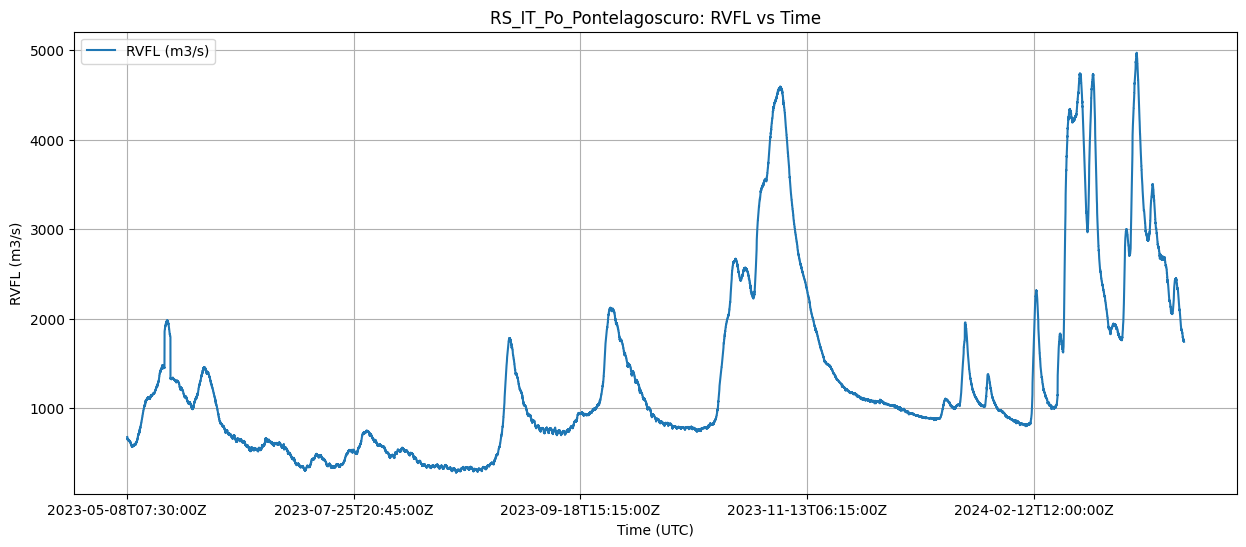

In [ ]:
ax = data_df.plot(x='time (UTC)', y='RVFL (m3/s)', figsize=(15, 6), rot=0)

plt.xlabel('Time (UTC)')
plt.ylabel('RVFL (m3/s)')
plt.title(f'{platform_code}: RVFL vs Time')
plt.grid(True)
plt.show()

In this second example we will use a bar plot to visualize the mean of river flow rate (RVFL) grouped by month, obtained in the ```Server-side functions``` section.

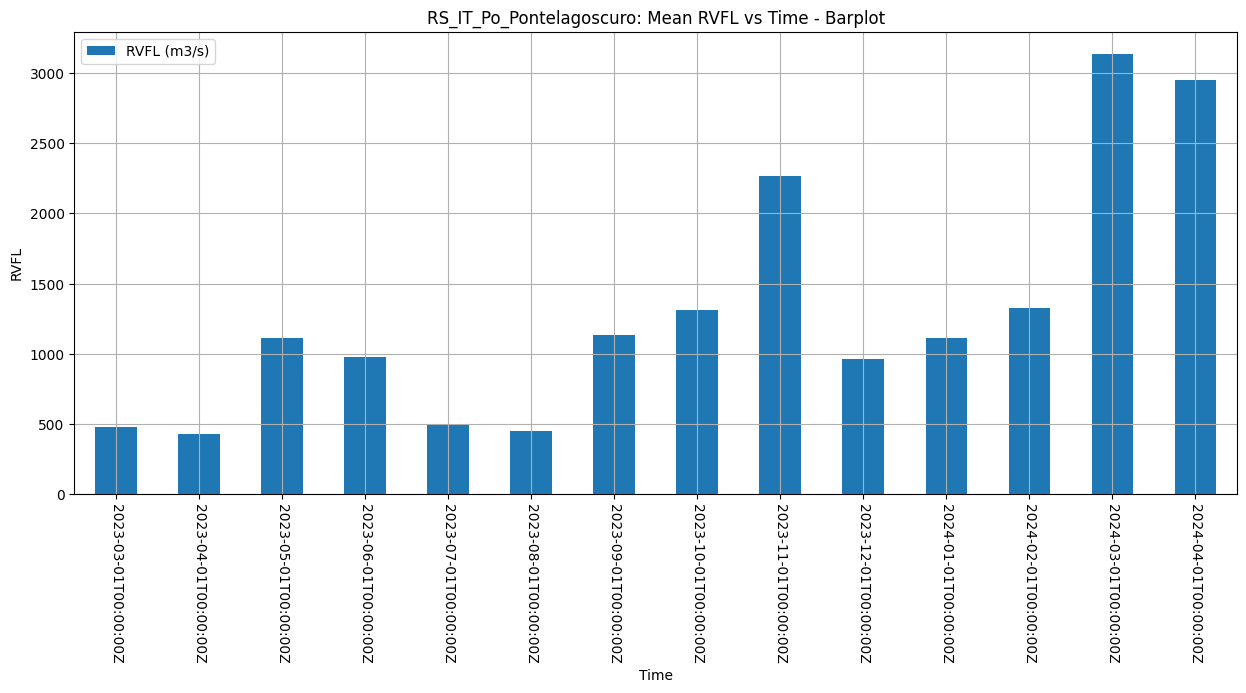

In [ ]:
ax = ordered_data_df.plot.bar(x='time (UTC)', y='RVFL (m3/s)', figsize=(15, 6), rot=270)

plt.xlabel('Time')
plt.ylabel('RVFL')
plt.title(f'{platform_code}: Mean RVFL vs Time - Barplot')
plt.grid(True)
plt.show()